# Data Cleaning

### Data Types & Conversion
Understanding Data Types in Python

Python has various data types, including integers, floats, strings, and datetime objects.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime 

# Create a sample dataset
data = {
    'Name': ['Jon', 'Lynn', 'Michael', 'Shane', 'Stephanie'],
    'Age': ['25', '30', '35', '40', '45'],  # Stored as strings
    'Salary': ['50000', '60000', '70000', '80000', '90000'],  # Stored as strings
    'Joining Date': ['2023-01-10', '2022-05-15', '2021-07-20', '2019-11-30', '2018-06-25'],  # Date in string format
    'Department': ['HR', 'Finance', 'IT', 'IT', 'Finance']
}

# Convert to DataFrame
df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)


Original DataFrame:


,Name,Age,Salary,Joining Date,Department
0,Jon,25,50000,2023-01-10,HR
1,Lynn,30,60000,2022-05-15,Finance
2,Michael,35,70000,2021-07-20,IT
3,Shane,40,80000,2019-11-30,IT
4,Stephanie,45,90000,2018-06-25,Finance


In [2]:
# Checking data types before conversion

print("\nData types before conversion:")
display(df.dtypes)


Data types before conversion:


Name            object
Age             object
Salary          object
Joining Date    object
Department      object
dtype: object

In [3]:
### Converting Data Types

# Convert 'Age' and 'Salary' to numeric
df['Age'] = pd.to_numeric(df['Age'])
df['Salary'] = pd.to_numeric(df['Salary'])

# Convert 'Joining Date' to datetime
df['Joining Date'] = pd.to_datetime(df['Joining Date'])

# Checking data types after conversion
print("\nData types after conversion:")
display(df.dtypes)


Data types after conversion:


Name                    object
Age                      int64
Salary                   int64
Joining Date    datetime64[ns]
Department              object
dtype: object

#### .loc
* label-based indexing
* It selects data by row label & column label


#### label vs position
* .loc → label-based (“Find the row named 2”)
 
* .iloc → position-based (“Find the row at position 2”)

In [4]:
### Mapping & Converting Categorical Data

# Convert 'Department' to categorical
df['Department'] = df['Department'].astype('category')

# Create a mapping for Department
dept_mapping = {'HR': 1, 'Finance': 2, 'IT': 3}
df['Department_Code'] = df['Department'].map(dept_mapping)

print("\nFinal DataFrame with Department mapped:")
display(df)


Final DataFrame with Department mapped:


,Name,Age,Salary,Joining Date,Department,Department_Code
0,Jon,25,50000,2023-01-10,HR,1
1,Lynn,30,60000,2022-05-15,Finance,2
2,Michael,35,70000,2021-07-20,IT,3
3,Shane,40,80000,2019-11-30,IT,3
4,Stephanie,45,90000,2018-06-25,Finance,2


### Handling Missing & Incorrect Data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a sample dataset with missing and incorrect values
data = {
    'Name': ['Lynn', 'Shane', 'Michael', 'Jon', np.nan],
    'Age': [25, np.nan, 35, 40, 28],
    'Salary': [50000, 60000, np.nan, 80000, 90000],
    'Joining Date': ['2023-01-10', '2022-05-15', 'Invalid Date', '2019-11-30', '2018-06-25'],
    'Department': ['HR', 'Finance', 'IT', np.nan, 'Finance']
}

# Convert to DataFrame
df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)

Original DataFrame:


,Name,Age,Salary,Joining Date,Department
0,Lynn,25.0,50000.0,2023-01-10,HR
1,Shane,NaN,60000.0,2022-05-15,Finance
2,Michael,35.0,NaN,Invalid Date,IT
3,Jon,40.0,80000.0,2019-11-30,NaN
4,NaN,28.0,90000.0,2018-06-25,Finance


In [6]:
### Detecting Missing Data
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


Name            1
Age             1
Salary          1
Joining Date    0
Department      1
dtype: int64

In [7]:
### Handling Missing Data

# Option 1: Removing rows with missing values
df_dropped = df.dropna()
print("\nDataFrame after dropping missing values:")
display(df_dropped)


DataFrame after dropping missing values:


,Name,Age,Salary,Joining Date,Department
0,Lynn,25.0,50000.0,2023-01-10,HR


In [8]:
# Drop rows only if Age or Salary is NaN

df_dropped_age = df.dropna(subset=['Age','Salary'])
display(df_dropped_age)

,Name,Age,Salary,Joining Date,Department
0,Lynn,25.0,50000.0,2023-01-10,HR
3,Jon,40.0,80000.0,2019-11-30,NaN
4,NaN,28.0,90000.0,2018-06-25,Finance


inplace = True

Apply the change directly to the original object, instead of returning a new one.

In [9]:
# Option 2: Filling missing values

# Fill 'Salary' with a default value
df['Salary'].fillna(0, inplace=True)

# Fill 'Age' with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill 'Department' with the most frequent value
df['Department'].fillna(df['Department'].mode()[0], inplace=True)

print("\nDataFrame after filling missing values:")
display(df)


DataFrame after filling missing values:


C:\Users\kheng\AppData\Local\Temp\ipykernel_22848\1205797880.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(0, inplace=True)
C:\Users\kheng\AppData\Local\Temp\ipykernel_22848\1205797880.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

,Name,Age,Salary,Joining Date,Department
0,Lynn,25.0,50000.0,2023-01-10,HR
1,Shane,32.0,60000.0,2022-05-15,Finance
2,Michael,35.0,0.0,Invalid Date,IT
3,Jon,40.0,80000.0,2019-11-30,Finance
4,NaN,28.0,90000.0,2018-06-25,Finance


In [10]:
### Handling Incorrect Data

# Converting 'Joining Date' to datetime, handling errors
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

# Identify and replace incorrect values in a column
# Suppose Age should be between 20 and 60; replace outliers
outlier_condition = (df['Age'] < 20) | (df['Age'] > 60)
df.loc[outlier_condition, 'Age'] = df['Age'].median()

print("\nDataFrame after handling incorrect values:")
display(df)


DataFrame after handling incorrect values:


,Name,Age,Salary,Joining Date,Department
0,Lynn,25.0,50000.0,2023-01-10,HR
1,Shane,32.0,60000.0,2022-05-15,Finance
2,Michael,35.0,0.0,NaT,IT
3,Jon,40.0,80000.0,2019-11-30,Finance
4,NaN,28.0,90000.0,2018-06-25,Finance


### Dealing with Text Data

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re

# Create a sample dataset with messy text data
data = {
    'Name': ['Alice Smith', 'BOB JOHNSON', 'Charlie Brown', 'DAVID WILLIAMS', 'Eve Clark'],
    'Email': ['alice @email.com', 'BOB@email.COM', 'charlie@email.com', 'david@email.com', 'eve@ email .com'],
    'Department': ['HR', 'finance', 'IT', 'it', 'Finance'],
    'Feedback': ['Great service!!!', 'average experience...', 'not good :(', 'EXCELLENT!!', 'bad support']
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

Original DataFrame:


,Name,Email,Department,Feedback
0,Alice Smith,alice @email.com,HR,Great service!!!
1,BOB JOHNSON,BOB@email.COM,finance,average experience...
2,Charlie Brown,charlie@email.com,IT,not good :(
3,DAVID WILLIAMS,david@email.com,it,EXCELLENT!!
4,Eve Clark,eve@ email .com,Finance,bad support


In [12]:
### Standardizing Text Data

# Convert all text columns to lowercase
df = df.apply(lambda col: col.astype(str).str.lower())
print("\nDataFrame after converting text to lowercase:")
display(df)


DataFrame after converting text to lowercase:


,Name,Email,Department,Feedback
0,alice smith,alice @email.com,hr,great service!!!
1,bob johnson,bob@email.com,finance,average experience...
2,charlie brown,charlie@email.com,it,not good :(
3,david williams,david@email.com,it,excellent!!
4,eve clark,eve@ email .com,finance,bad support


In [13]:
# Trim spaces and remove extra spaces in email

# \s → any whitespace character (space, tab, newline)
# + → one or more times
df['Email'] = df['Email'].str.replace(r'\s+', '', regex=True)
print("\nDataFrame after cleaning email column:")
display(df[['Email']])


DataFrame after cleaning email column:


,Email
0,alice@email.com
1,bob@email.com
2,charlie@email.com
3,david@email.com
4,eve@email.com


Pandas Series does not have .replace() for regex-based string ops
* .str tells pandas to apply this string function to each element

In [14]:
# Standardize department names

df['Department'] = df['Department'].replace({'finance': 'Finance', 'it': 'IT', 'hr': 'HR'})
print("\nDataFrame after standardizing department names:")
display(df[['Department']])


DataFrame after standardizing department names:


,Department
0,HR
1,Finance
2,IT
3,IT
4,Finance


.replace() here performs value substitution and replaces entire cell values

In [15]:
### Handling Inconsistent and Noisy Text

# Removing special characters from feedback
df['Feedback'] = df['Feedback'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
# [^a-zA-Z0-9 ] Match anything EXCEPT letters, numbers, and spaces

print("\nDataFrame after removing special characters from feedback:")
display(df[['Feedback']])


DataFrame after removing special characters from feedback:


,Feedback
0,great service
1,average experience
2,not good
3,excellent
4,bad support


In [16]:
### Extracting Information from Text

# Extract domain from email using regex
df['Email Domain'] = df['Email'].str.extract(r'@([a-zA-Z0-9.-]+)') # + means one or more times
print("\nDataFrame after extracting email domains:")
display(df[['Email', 'Email Domain']])


DataFrame after extracting email domains:


,Email,Email Domain
0,alice@email.com,email.com
1,bob@email.com,email.com
2,charlie@email.com,email.com
3,david@email.com,email.com
4,eve@email.com,email.com


In [17]:
### Finding and Replacing Specific Words

# Replace 'bad' and 'not good' with 'negative'
df['Feedback'] = df['Feedback'].replace({'bad': 'negative', 'not good': 'negative'}, regex=True)
# Without regex=True, only replaces entire cell values that are exactly "bad".

print("\nDataFrame after replacing words in feedback:")
display(df[['Feedback']])


DataFrame after replacing words in feedback:


,Feedback
0,great service
1,average experience
2,negative
3,excellent
4,negative support


### Detecting & Handling Outliers


In [18]:
# %pip install matplotlib seaborn

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset with outliers
data = {
    'Employee': ['Lynn', 'Shane', 'Michael', 'Mei', 'Adeline', 'Stephanie', 'Carol', 'Vivian', 'Harvey', 'Ken'],
    'Salary': [50000, 52000, 51000, 53000, 49000, 60000, 62000, 65000, 70000, 150000],  # Outlier at 150000
    'Age': [25, 26, 24, 27, 25, 29, 30, 31, 32, 60],  # Possible outlier at 60
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

Original DataFrame:


,Employee,Salary,Age
0,Lynn,50000,25
1,Shane,52000,26
2,Michael,51000,24
3,Mei,53000,27
4,Adeline,49000,25
5,Stephanie,60000,29
6,Carol,62000,30
7,Vivian,65000,31
8,Harvey,70000,32
9,Ken,150000,60


In [20]:
### Detecting Outliers
# Using Summary Statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Salary,Age
count,10.00000,10.000000
mean,66200.00000,30.900000
std,30294.11384,10.587729
min,49000.00000,24.000000
25%,51250.00000,25.250000
50%,56500.00000,28.000000
75%,64250.00000,30.750000
max,150000.00000,60.000000


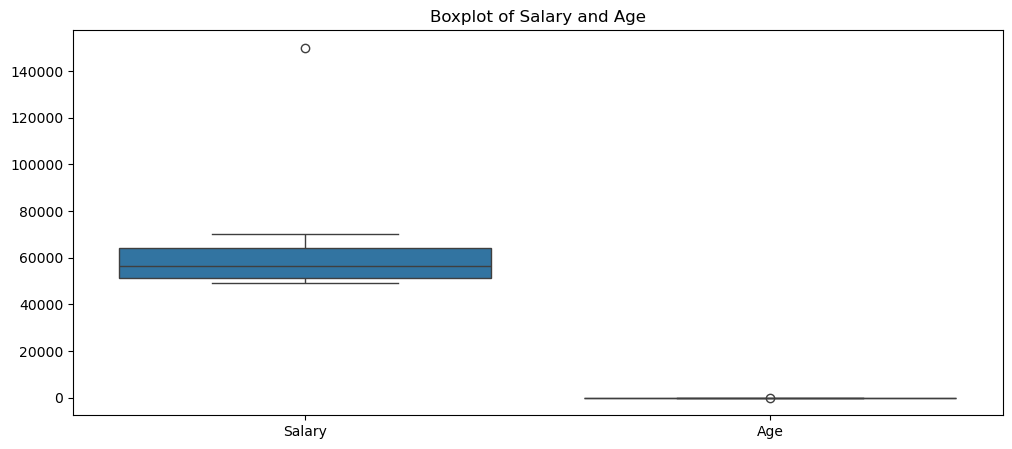

In [21]:
# Visualizing Outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Salary', 'Age']])
plt.title("Boxplot of Salary and Age")
plt.show()

In [22]:
### Detecting Outliers Using IQR (Interquartile Range)
Q1 = df[['Salary', 'Age']].quantile(0.25)
Q3 = df[['Salary', 'Age']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df[['Salary', 'Age']] < (Q1 - 1.5 * IQR)) | (df[['Salary', 'Age']] > (Q3 + 1.5 * IQR))
print("\nDetected Outliers:")
display(df[outlier_condition.any(axis=1)])


Detected Outliers:


,Employee,Salary,Age
9,Ken,150000,60


In [23]:
### Handling Outliers

# Option 1: Removing Outliers
df_removed = df[~outlier_condition.any(axis=1)]
print("\nDataFrame after removing outliers:")
display(df_removed)


DataFrame after removing outliers:


,Employee,Salary,Age
0,Lynn,50000,25
1,Shane,52000,26
2,Michael,51000,24
3,Mei,53000,27
4,Adeline,49000,25
5,Stephanie,60000,29
6,Carol,62000,30
7,Vivian,65000,31
8,Harvey,70000,32


In [24]:
# Option 2: Replacing Outliers with Median
df_replaced = df.copy()
df_replaced.loc[outlier_condition.any(axis=1), ['Salary', 'Age']] = df[['Salary', 'Age']].median()
print("\nDataFrame after replacing outliers with median:")
display(df_replaced)


DataFrame after replacing outliers with median:


,Employee,Salary,Age
0,Lynn,50000.0,25.0
1,Shane,52000.0,26.0
2,Michael,51000.0,24.0
3,Mei,53000.0,27.0
4,Adeline,49000.0,25.0
5,Stephanie,60000.0,29.0
6,Carol,62000.0,30.0
7,Vivian,65000.0,31.0
8,Harvey,70000.0,32.0
9,Ken,NaN,NaN


In [25]:
# Option 3: Capping Outliers (Winsorization)
df_capped = df.copy()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_capped[['Salary', 'Age']] = np.where(df_capped[['Salary', 'Age']] < lower_bound, lower_bound, df_capped[['Salary', 'Age']])
df_capped[['Salary', 'Age']] = np.where(df_capped[['Salary', 'Age']] > upper_bound, upper_bound, df_capped[['Salary', 'Age']])

print("\nDataFrame after capping outliers:")
display(df_capped)


DataFrame after capping outliers:


,Employee,Salary,Age
0,Lynn,50000.0,25.0
1,Shane,52000.0,26.0
2,Michael,51000.0,24.0
3,Mei,53000.0,27.0
4,Adeline,49000.0,25.0
5,Stephanie,60000.0,29.0
6,Carol,62000.0,30.0
7,Vivian,65000.0,31.0
8,Harvey,70000.0,32.0
9,Ken,83750.0,39.0


### Data Deduplication

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a sample dataset with duplicate records
data = {
    'Employee ID': [101, 102, 103, 104, 101, 105, 102, 106, 107, 108],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Alice', 'Eve', 'Bob', 'Grace', 'Hank', 'Ivy'],
    'Department': ['HR', 'Finance', 'IT', 'IT', 'HR', 'Finance', 'Finance', 'IT', 'HR', 'Finance'],
    'Salary': [50000, 52000, 51000, 53000, 50000, 60000, 52000, 62000, 49000, 60000]
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

Original DataFrame:


,Employee ID,Name,Department,Salary
0,101,Alice,HR,50000
1,102,Bob,Finance,52000
2,103,Charlie,IT,51000
3,104,David,IT,53000
4,101,Alice,HR,50000
5,105,Eve,Finance,60000
6,102,Bob,Finance,52000
7,106,Grace,IT,62000
8,107,Hank,HR,49000
9,108,Ivy,Finance,60000


In [27]:
### Detecting Duplicate Records

# Identifying duplicate rows based on all columns
duplicates = df.duplicated()
print("\nDuplicate Rows:")
display(df[duplicates])


Duplicate Rows:


,Employee ID,Name,Department,Salary
4,101,Alice,HR,50000
6,102,Bob,Finance,52000


In [28]:
# Identifying duplicate rows based on 'Employee ID'
print("\nDuplicate Employee IDs:")
display(df[df.duplicated(subset=['Employee ID', 'Name'], keep=False)])


Duplicate Employee IDs:


,Employee ID,Name,Department,Salary
0,101,Alice,HR,50000
1,102,Bob,Finance,52000
4,101,Alice,HR,50000
6,102,Bob,Finance,52000


In [29]:
### Handling Duplicates

# Option 1: Removing exact duplicates
df_removed = df.drop_duplicates()
print("\nDataFrame after removing exact duplicates:")
display(df_removed)


DataFrame after removing exact duplicates:


,Employee ID,Name,Department,Salary
0,101,Alice,HR,50000
1,102,Bob,Finance,52000
2,103,Charlie,IT,51000
3,104,David,IT,53000
5,105,Eve,Finance,60000
7,106,Grace,IT,62000
8,107,Hank,HR,49000
9,108,Ivy,Finance,60000


In [30]:
# Option 2: Keeping the first occurrence

df_first = df.drop_duplicates(subset=['Employee ID', 'Name'], keep='first')
print("\nDataFrame after keeping first occurrence:")
display(df_first)


DataFrame after keeping first occurrence:


,Employee ID,Name,Department,Salary
0,101,Alice,HR,50000
1,102,Bob,Finance,52000
2,103,Charlie,IT,51000
3,104,David,IT,53000
5,105,Eve,Finance,60000
7,106,Grace,IT,62000
8,107,Hank,HR,49000
9,108,Ivy,Finance,60000


In [31]:
# Option 3: Keeping the last occurrence

df_last = df.drop_duplicates(subset=['Employee ID'], keep='last')
print("\nDataFrame after keeping last occurrence:")
display(df_last)


DataFrame after keeping last occurrence:


,Employee ID,Name,Department,Salary
2,103,Charlie,IT,51000
3,104,David,IT,53000
4,101,Alice,HR,50000
5,105,Eve,Finance,60000
6,102,Bob,Finance,52000
7,106,Grace,IT,62000
8,107,Hank,HR,49000
9,108,Ivy,Finance,60000


### Creating New Columns

In [32]:
### Creating New Columns in Pandas
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'Employee': ['Lynn', 'Shane', 'Michael', 'Harvey', 'Vivian'],
    'Salary': [50000, 52000, 51000, 53000, 49000],
    'Joining Date': ['2023-01-10', '2022-05-15', '2021-07-20', '2019-11-30', '2018-06-25'],
    'Department': ['HR', 'Finance', 'IT', 'IT', 'Finance']
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
display(df)

Original DataFrame:


,Employee,Salary,Joining Date,Department
0,Lynn,50000,2023-01-10,HR
1,Shane,52000,2022-05-15,Finance
2,Michael,51000,2021-07-20,IT
3,Harvey,53000,2019-11-30,IT
4,Vivian,49000,2018-06-25,Finance


In [33]:
### Creating Numeric Columns

# Adding a new column: Bonus (10% of Salary)
df['Bonus'] = df['Salary'] * 0.10
print("\nDataFrame after adding Bonus column:")
display(df)


DataFrame after adding Bonus column:


,Employee,Salary,Joining Date,Department,Bonus
0,Lynn,50000,2023-01-10,HR,5000.0
1,Shane,52000,2022-05-15,Finance,5200.0
2,Michael,51000,2021-07-20,IT,5100.0
3,Harvey,53000,2019-11-30,IT,5300.0
4,Vivian,49000,2018-06-25,Finance,4900.0


In [34]:
# Creating a column that categorizes employees based on salary level

def categorize_salary(salary):
    if salary < 50000:
        return 'Low'
    elif 50000 <= salary < 55000:
        return 'Medium'
    else:
        return 'High'

df['Salary Category'] = df['Salary'].apply(categorize_salary)
print("\nDataFrame after adding Salary Category:")
display(df)


DataFrame after adding Salary Category:


,Employee,Salary,Joining Date,Department,Bonus,Salary Category
0,Lynn,50000,2023-01-10,HR,5000.0,Medium
1,Shane,52000,2022-05-15,Finance,5200.0,Medium
2,Michael,51000,2021-07-20,IT,5100.0,Medium
3,Harvey,53000,2019-11-30,IT,5300.0,Medium
4,Vivian,49000,2018-06-25,Finance,4900.0,Low


In [35]:
### Creating DateTime Columns

# Convert 'Joining Date' to datetime format
df['Joining Date'] = pd.to_datetime(df['Joining Date'])

# Extract year, month, and day from 'Joining Date'
df['Joining Year'] = df['Joining Date'].dt.year
df['Joining Month'] = df['Joining Date'].dt.month
df['Joining Day'] = df['Joining Date'].dt.day

print("\nDataFrame after extracting DateTime features:")
display(df)


DataFrame after extracting DateTime features:


,Employee,Salary,Joining Date,Department,Bonus,Salary Category,Joining Year,Joining Month,Joining Day
0,Lynn,50000,2023-01-10,HR,5000.0,Medium,2023,1,10
1,Shane,52000,2022-05-15,Finance,5200.0,Medium,2022,5,15
2,Michael,51000,2021-07-20,IT,5100.0,Medium,2021,7,20
3,Harvey,53000,2019-11-30,IT,5300.0,Medium,2019,11,30
4,Vivian,49000,2018-06-25,Finance,4900.0,Low,2018,6,25


In [36]:
### Creating Text Columns

# Combining Employee Name and Department to create a new column
df['Employee Info'] = df['Employee'] + ' - ' + df['Department']
print("\nDataFrame after adding Employee Info column:")
display(df)



DataFrame after adding Employee Info column:


,Employee,Salary,Joining Date,Department,Bonus,Salary Category,Joining Year,Joining Month,Joining Day,Employee Info
0,Lynn,50000,2023-01-10,HR,5000.0,Medium,2023,1,10,Lynn - HR
1,Shane,52000,2022-05-15,Finance,5200.0,Medium,2022,5,15,Shane - Finance
2,Michael,51000,2021-07-20,IT,5100.0,Medium,2021,7,20,Michael - IT
3,Harvey,53000,2019-11-30,IT,5300.0,Medium,2019,11,30,Harvey - IT
4,Vivian,49000,2018-06-25,Finance,4900.0,Low,2018,6,25,Vivian - Finance


In [37]:
# Creating an uppercase version of Employee names

df['Employee Uppercase'] = df['Employee'].str.upper()
print("\nDataFrame after adding Uppercase Employee column:")
display(df)



DataFrame after adding Uppercase Employee column:


,Employee,Salary,Joining Date,Department,Bonus,Salary Category,Joining Year,Joining Month,Joining Day,Employee Info,Employee Uppercase
0,Lynn,50000,2023-01-10,HR,5000.0,Medium,2023,1,10,Lynn - HR,LYNN
1,Shane,52000,2022-05-15,Finance,5200.0,Medium,2022,5,15,Shane - Finance,SHANE
2,Michael,51000,2021-07-20,IT,5100.0,Medium,2021,7,20,Michael - IT,MICHAEL
3,Harvey,53000,2019-11-30,IT,5300.0,Medium,2019,11,30,Harvey - IT,HARVEY
4,Vivian,49000,2018-06-25,Finance,4900.0,Low,2018,6,25,Vivian - Finance,VIVIAN
